# K-nearest neighbors
In questo notebook eseguiremo una classificazione di cifre scritte a mano utlizzando i K-nearest-neighbors (KNN).
KNN è un modello estremamente semplice che permette di eseguire classificazioni cercando i K esempi più simili (nearest neighbors, in italiano vicini più prossimi) all'interno del dataset, l'esempio viene classificato con la classe più presente tra i K esempi più simili.
<img src="res/knn.png" width="300px"/>
Importiamo le libreire che utilizzaremo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

Carichiamo il dataset utilizzando scikit-learn.

In [2]:
digits = load_digits()

E creiamo gli array numpy per train e test.

In [3]:
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape

(1257, 64)

Trattandosi di immagini, eseguiamo una normalizzazione.

In [4]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

Adesso creiamo il modello KNN, creiamone più di uno utilizzando diversi valori di K e confrontiamone i risultati

In [5]:
from sklearn.neighbors import KNeighborsClassifier

Ks = [1,2,3,4,5,7,10,12,15,20]

for K in Ks:
    print("K="+str(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train,Y_train)
    
    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)
    
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)
    
    accuracy_train = accuracy_score(Y_train, y_pred_train)
    accuracy_test = accuracy_score(Y_test, y_pred)

    loss_train = log_loss(Y_train, y_prob_train)
    loss_test = log_loss(Y_test, y_prob)
    
    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))

K=1
ACCURACY: TRAIN=1.0000 TEST=0.9889
LOG LOSS: TRAIN=0.0000 TEST=0.3838
K=2
ACCURACY: TRAIN=0.9897 TEST=0.9833
LOG LOSS: TRAIN=0.0099 TEST=0.2060
K=3
ACCURACY: TRAIN=0.9912 TEST=0.9889
LOG LOSS: TRAIN=0.0164 TEST=0.1509
K=4
ACCURACY: TRAIN=0.9889 TEST=0.9796
LOG LOSS: TRAIN=0.0233 TEST=0.1557
K=5
ACCURACY: TRAIN=0.9897 TEST=0.9870
LOG LOSS: TRAIN=0.0295 TEST=0.1629
K=7
ACCURACY: TRAIN=0.9897 TEST=0.9796
LOG LOSS: TRAIN=0.0422 TEST=0.1773
K=10
ACCURACY: TRAIN=0.9825 TEST=0.9741
LOG LOSS: TRAIN=0.0584 TEST=0.1326
K=12
ACCURACY: TRAIN=0.9809 TEST=0.9741
LOG LOSS: TRAIN=0.0668 TEST=0.1449
K=15
ACCURACY: TRAIN=0.9801 TEST=0.9685
LOG LOSS: TRAIN=0.0825 TEST=0.1587
K=20
ACCURACY: TRAIN=0.9745 TEST=0.9593
LOG LOSS: TRAIN=0.1076 TEST=0.1854


Per K=3 otteniamo i risultati migliori.<br>
Diamo uno sguardo alle immagini che il modello ha sbagliato a classificare.

Numero 2 classificato come 7


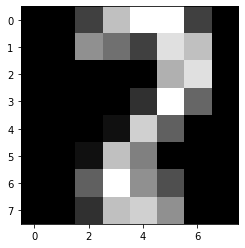

Numero 9 classificato come 7


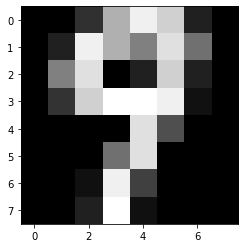

Numero 2 classificato come 0


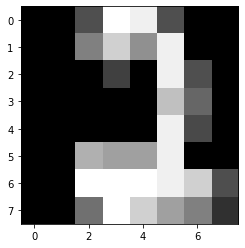

Numero 8 classificato come 3


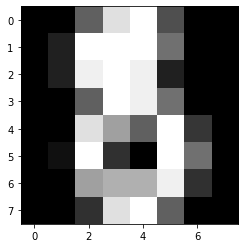

Numero 8 classificato come 1


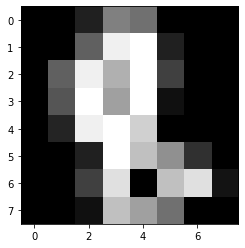

Numero 8 classificato come 7


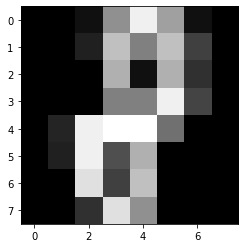

Numero 8 classificato come 1


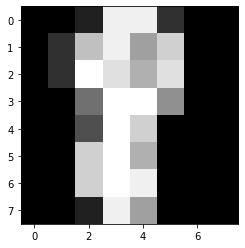

Numero 8 classificato come 3


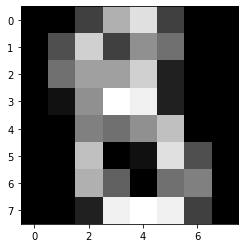

Numero 5 classificato come 9


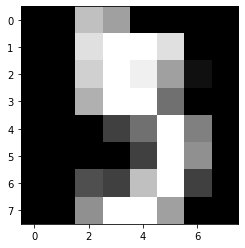

Numero 2 classificato come 8


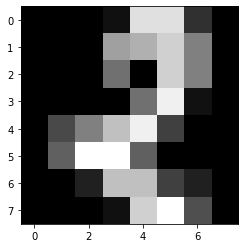

Numero 8 classificato come 1


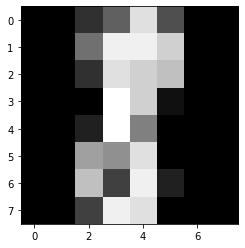

Numero 3 classificato come 2


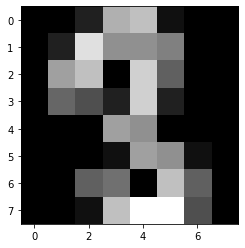

Numero 9 classificato come 5


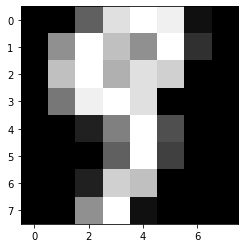

Numero 4 classificato come 7


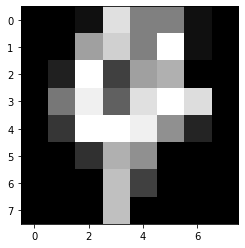

Numero 3 classificato come 8


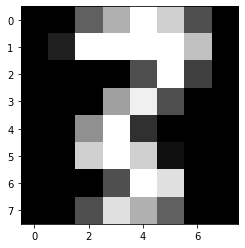

Numero 8 classificato come 1


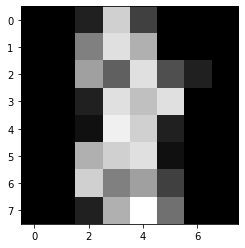

Numero 1 classificato come 6


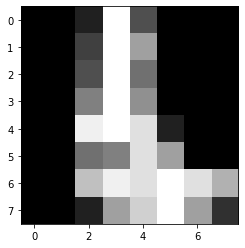

Numero 3 classificato come 9


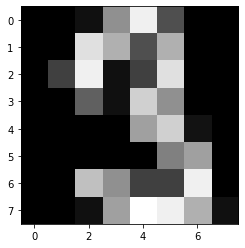

Numero 2 classificato come 8


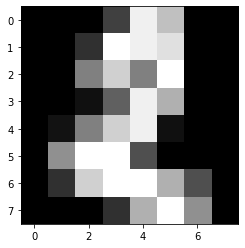

Numero 5 classificato come 6


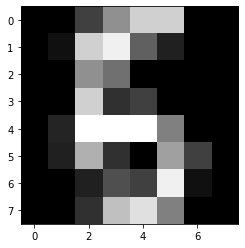

Numero 2 classificato come 1


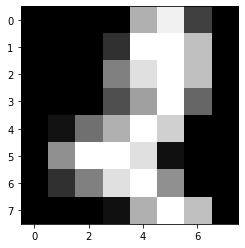

Numero 3 classificato come 8


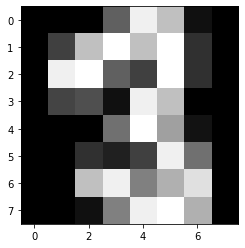

In [6]:
for i in range(0,len(X_test)):
    if(Y_test[i]!=y_pred[i]):
        print("Numero %d classificato come %d" % (Y_test[i], y_pred[i]))
        plt.imshow(X_test[i].reshape([8,8]), cmap="gray")
        plt.show()

Come vedi la maggior parte di loro sono difficilmente riconoscibili anche per un occhio umano, quindi il KNN ha fatto un buon lavoro.